In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cm
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/')
import scendict as sc

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
def get_means(scen):
    tw = f'/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/ncs/T2_scen_{scen}_monthly_wspd.nc'
    print(scen)
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
    test_csize = tmesh.csize[0:37,:].values
    tweights = np.ravel(test_csize)
    q = xr.open_dataset(tw)
    tscen = np.zeros([12,161])
    for i in range(0,161):
        for m in range(0,12):
            test_wspd = (q.mean_wspd[i,m,0:37,:].values)
            data = np.ravel(test_wspd)

            mean, sumw = np.ma.average(data, weights=list(tweights), returned=True)
            # if np.isnan(mean):
            #     print(m)
            #     print(i+1940)

            tscen[m,i] = mean
    return tscen

In [4]:

# scen_2A_means = get_means('2A')
# scen_2B_means = get_means('2B')


In [5]:
scen_1A_means = get_means('1A')
scen_1B_means = get_means('1B')
scen_2A_means = get_means('2A')
scen_2B_means = get_means('2B')
scen_3A_means = get_means('3A')
scen_3B_means = get_means('3B')

1A
1B
2A
2B
3A
3B


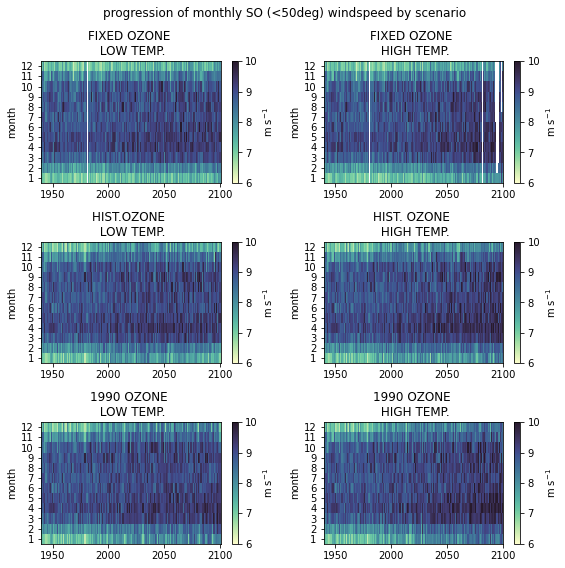

In [6]:
tvmin = 6
tvmax = 10
mons = np.arange(1,13,1)
yrs = np.arange(1940,2101,1)
yrsG, monsG = np.meshgrid(yrs,mons) 

scen = [scen_2A_means,scen_2B_means,\
        scen_1A_means,scen_1B_means,\
        scen_3A_means,scen_3B_means]
sc_tit = ['2A', '2B','1A','1B','3A','3B']
fact = 0.4
fig, axs = plt.subplots(3,2, figsize=(20*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,6):

    w = axs[i].pcolormesh(yrsG, monsG, scen[i],\
                      cmap = cm.cm.deep, vmin = tvmin, vmax = tvmax)
    axs[i].set_title(sc.scen[sc_tit[i]]['name'])
    axs[i].set_yticks(np.arange(1,13,1))
    axs[i].set_ylabel('month')
    fig.colorbar(w, ax=axs[i], orientation='vertical', label = 'm s$^{-1}$')

plt.suptitle('progression of monthly SO (<50deg) windspeed by scenario')
plt.tight_layout()
###### 

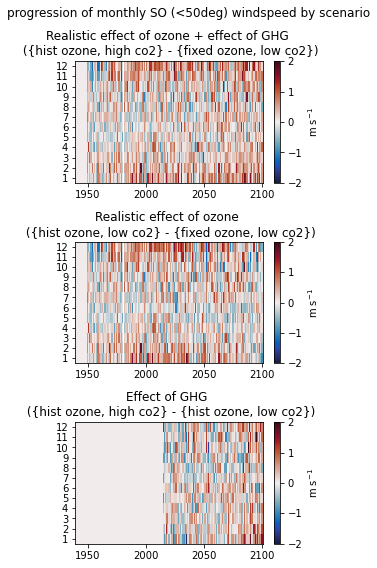

In [7]:
#sc.scen[sc_tit[i]]['name']

tvmin = -2
tvmax = 2
mons = np.arange(1,13,1)
yrs = np.arange(1940,2101,1)
yrsG, monsG = np.meshgrid(yrs,mons) 

effect_ozone_ghg = (scen_1B_means-scen_2A_means)
effect_ozone = (scen_1A_means-scen_2A_means)
effect_ghg = (scen_1B_means-scen_1A_means)
scen = [(scen_1B_means-scen_2A_means),\
        (scen_1A_means-scen_2A_means),\
        (scen_1B_means-scen_1A_means)]
scen = [effect_ozone_ghg,effect_ozone,effect_ghg]
sc_tit = ['Realistic effect of ozone + effect of GHG \n ({hist ozone, high co2} - {fixed ozone, low co2})',\
         'Realistic effect of ozone \n ({hist ozone, low co2} - {fixed ozone, low co2})',\
         'Effect of GHG \n ({hist ozone, high co2} - {hist ozone, low co2})']
fact = 0.4
fig, axs = plt.subplots(3,1, figsize=(10*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,3):

    w = axs[i].pcolormesh(yrsG, monsG, scen[i],\
                      cmap = cm.cm.balance, vmin = tvmin, vmax = tvmax)
    axs[i].set_title(sc_tit[i])
    axs[i].set_yticks(np.arange(1,13,1))
    fig.colorbar(w, ax=axs[i], orientation='vertical', label = 'm s$^{-1}$')

plt.suptitle('progression of monthly SO (<50deg) windspeed by scenario')
plt.tight_layout()
###### 

In [8]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [9]:
scen = [effect_ozone_ghg,effect_ozone,effect_ghg]



## apply a 10year running average

In [10]:
np.shape(effect_ozone_ghg)

scen = [effect_ozone_ghg,effect_ozone,effect_ghg] 
effect_ozone_ghg_s = np.zeros_like(effect_ozone_ghg)
effect_ozone_s = np.zeros_like(effect_ozone_ghg)
effect_ghg_s = np.zeros_like(effect_ozone_ghg)
for i in range(0,12):
    effect_ozone_ghg_s[i,5:157] = moving_average(effect_ozone_ghg[i,:], 10)
    effect_ozone_s[i,5:157] = moving_average(effect_ozone[i,:], 10)
    effect_ghg_s[i,5:157] = moving_average(effect_ghg[i,:], 10)


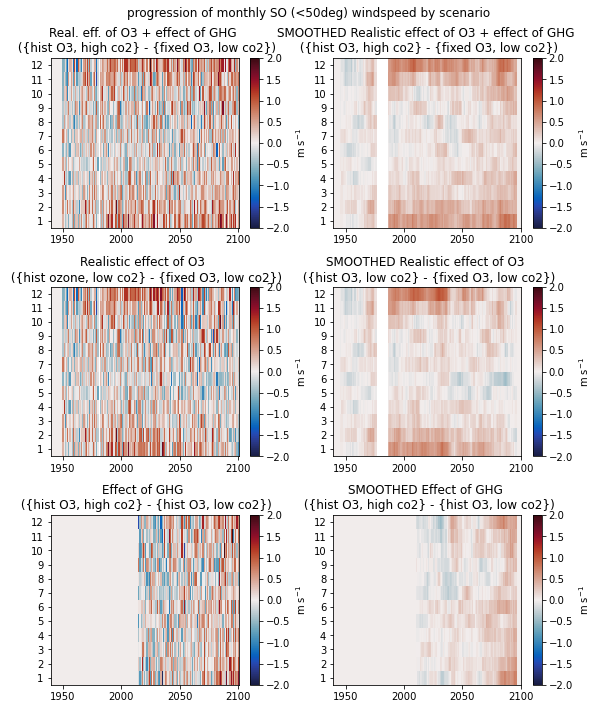

In [11]:
#sc.scen[sc_tit[i]]['name']

tvmin = -2
tvmax = 2
mons = np.arange(1,13,1)
yrs = np.arange(1940,2101,1)
yrsG, monsG = np.meshgrid(yrs,mons) 

effect_ozone_ghg = (scen_1B_means-scen_2A_means)
effect_ozone = (scen_1A_means-scen_2A_means)
effect_ghg = (scen_1B_means-scen_1A_means)
scen = [(scen_1B_means-scen_2A_means),\
        (scen_1A_means-scen_2A_means),\
        (scen_1B_means-scen_1A_means)]
scen = [effect_ozone_ghg,effect_ozone_ghg_s,\
        effect_ozone, effect_ozone_s,\
        effect_ghg, effect_ghg_s]

sc_tit = ['Real. eff. of O3 + effect of GHG \n ({hist O3, high co2} - {fixed O3, low co2})',\
          'SMOOTHED Realistic effect of O3 + effect of GHG \n ({hist O3, high co2} - {fixed O3, low co2})',\
         'Realistic effect of O3 \n ({hist ozone, low co2} - {fixed O3, low co2})',\
          'SMOOTHED Realistic effect of O3 \n ({hist O3, low co2} - {fixed O3, low co2})',\
         'Effect of GHG \n ({hist O3, high co2} - {hist O3, low co2})',\
         'SMOOTHED Effect of GHG \n ({hist O3, high co2} - {hist O3, low co2})']

fact = 0.4
fig, axs = plt.subplots(3,2, figsize=(20*fact, 25*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,6):

    w = axs[i].pcolormesh(yrsG, monsG, scen[i],\
                      cmap = cm.cm.balance, vmin = tvmin, vmax = tvmax)
    axs[i].set_title(sc_tit[i])
    axs[i].set_yticks(np.arange(1,13,1))
    fig.colorbar(w, ax=axs[i], orientation='vertical', label = 'm s$^{-1}$')

plt.suptitle('progression of monthly SO (<50deg) windspeed by scenario')
plt.tight_layout()
###### 

## years with missing values:

2A: 1981

2B: 1981, 2082,2094-2096, 2099

In [12]:
import netCDF4 as nc
scen = '2A'
yr = 1981
rdir = '/gpfs/data/greenocean/software/resources/MetProcessed/MET_forcing/'
tw = nc.Dataset(f'{rdir}scen_{scen}/MetOffice_tauy_y{yr}.nc') 
t_nc1 = tw['vflx'][:]
print(t_nc1)
# tw = nc.Dataset(f'{rdir}scen_{scen}/MetOffice_taux_y{yr}.nc') 
# t_nc2 = tw['uflx'][:]
# t_nc = np.sqrt(t_nc1**2+t_nc2**2)


[]


/gpfs/home/mep22dku/.conda/envs/swampenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
